<h1 style="color:tomato;text-align:center;font-size:300%;font-family:verdana;"> Customer Segmentation Excercise</h1>

Poo

We are an online company and we have dataset containing online sales.<br>
We want to segment our customers to groups to give them targeted commercials.<br> 

the goal is to find the best customer segmentation.

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
import visuals as vs
from sklearn.mixture import GaussianMixture
from pandas.plotting import scatter_matrix
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

### Import the data and print the head
you might need to use encoding='unicode_escape'

In [4]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Check the shape of the data

In [5]:
print(data.shape)

(541909, 8)


---
# Exploratory Data Analysis

### Check the info

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


### Generate descriptive statistics

In [7]:
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


### How much of the data per feature is null values, percentage-wise
Expected Answer:<br>
InvoiceNo       0.000000<br>
StockCode       0.000000<br>
Description     0.268311<br>
Quantity        0.000000<br>
InvoiceDate     0.000000<br>
UnitPrice       0.000000<br>
CustomerID     24.926694<br>
Country         0.000000

In [8]:
null_values = data.isnull().sum()/len(data)*100
print(null_values)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


___
# Feature Engineering

### Drop the null values

In [9]:
data = data.dropna()

### Check again the shape of the data

In [10]:
print(data.shape)

(406829, 8)


### Change the customer id feature to a string type

In [11]:
data['CustomerID'] = data['CustomerID'].astype(str)

### Change the invoice date to a datetime type
use format='%d-%m-%Y %H:%M'

In [12]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format='%d-%m-%Y %H:%M')

### Create a feature of the total amount spent
quantity * unit price

In [13]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

### Check the head of the data

In [14]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalAmount  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom        20.34  


### Sum the total amount spent per customer id to a new data frame and print the head
the new data frame should contain only customer id and total amount spent

In [15]:
CustomerTotalAmount = data.groupby("CustomerID")["TotalAmount"].sum().reset_index()
print(CustomerTotalAmount.head())

  CustomerID  TotalAmount
0    12346.0         0.00
1    12347.0      4310.00
2    12348.0      1797.24
3    12349.0      1757.55
4    12350.0       334.40


### Count the invoice numbers per customer id to a new data frame and print the head

In [16]:
CustomerInvoicesCount = data.groupby("CustomerID")["InvoiceNo"].count().reset_index()
print(CustomerInvoicesCount.head())

  CustomerID  InvoiceNo
0    12346.0          2
1    12347.0        182
2    12348.0         31
3    12349.0         73
4    12350.0         17


###  Find how many days passed between each customer's transaction and the last transaction of the company - make a new data frame containing each customer's transaction (min) and print the head

In [17]:
company_last_transaction_date = data['InvoiceDate'].max()
last_transaction_per_customer = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_transaction_per_customer.columns = ['CustomerID', 'LastTransactionDate']
last_transaction_per_customer['Days_From_Last'] = (company_last_transaction_date - last_transaction_per_customer['LastTransactionDate']).dt.days
Last_Company_Transaction = last_transaction_per_customer[['CustomerID', 'Days_From_Last']].copy()

print(Last_Company_Transaction.head())


  CustomerID  Days_From_Last
0    12346.0             325
1    12347.0               1
2    12348.0              74
3    12349.0              18
4    12350.0             309


### Merge the total amount spent data frame and the invoice number data frame


In [18]:
data_per_ID = CustomerInvoicesCount.merge(CustomerTotalAmount, on='CustomerID')

### Merge the above data frame and the last transaction data frame


In [19]:
data_per_ID = data_per_ID.merge(Last_Company_Transaction, on='CustomerID')

### Change the last transaction column to show only the days
use datetime's days method

In [22]:
print('already done it - [17] line 4: "...).dt.days".')

already done it - [17] line 4: "...).dt.days".


### Make sure the features names are: CustomerID, Total_Amount_Spent, Last_invoice, Last_transaction

In [23]:
data_per_ID = data_per_ID.rename(columns={
    'TotalAmount': 'Total_Amount_Spent',
    'InvoiceNo': 'Last_invoice',
    'Days_From_Last': 'Last_transaction'
})

### Check the shape of the new data frame
<u><b>from now on any mention of data frame refers to the new data frame</b></u>

In [24]:
print(data_per_ID.shape)

(4372, 4)


### Drop the customer id column

In [25]:
new_df = data_per_ID.drop('CustomerID', axis=1)
print(new_df.head())

   Last_invoice  Total_Amount_Spent  Last_transaction
0             2                0.00               325
1           182             4310.00                 1
2            31             1797.24                74
3            73             1757.55                18
4            17              334.40               309


___
# Segmentation

### Create a new data frame containing the indices 1, 4302, 2438, 261 and display the data frame

In [26]:
indices  = [1,4302,2438,261]
samples = pd.DataFrame(new_df.loc[indices])
print(samples)

      Last_invoice  Total_Amount_Spent  Last_transaction
1              182             4310.00                 1
4302            18              212.96               150
2438           495            12433.34                 3
261            232             3817.08                 0


### Display a heatmap of the indices data frame percentiles
print the annotations

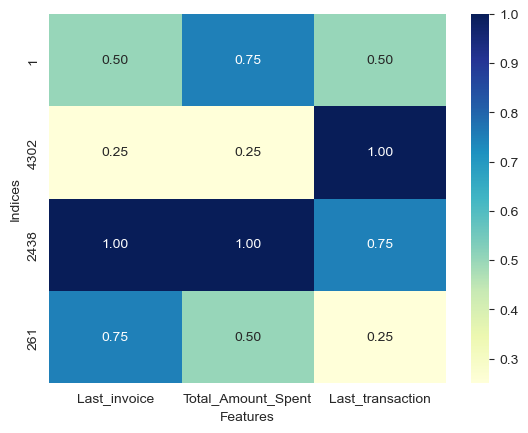

- the heatmap related to the new_df dataset.
for example, the percentiles of indice 2438 point out
that 99% of the values in all the dataset features(new_df)- behind him
it means he is the max values for those features(Last_invoice, Total_Amount_Spent).
Additionally, he is from the last 25% transactions in the company
Good customer


In [30]:
percentiles = samples.rank(pct=True)
heatmap = sns.heatmap(percentiles, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel("Features")
plt.ylabel("Indices")
plt.show()
print('- the heatmap related to the new_df dataset.')
print('for example, the percentiles of indice 2438 point out')
print('that 99% of the values in all the dataset features(new_df)- behind him')
print('it means he is the max values for those features(Last_invoice, Total_Amount_Spent).')

print('Additionally, he is from the last 25% transactions in the company')
print('Good customer')

### What are the data frames keys?

In [31]:
print("Keys for data: ")
print(data.keys())
print("Keys for new_df: ")
print(new_df.keys())
print("Keys for samples: ")
print(samples.keys())

Keys for data: 
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')
Keys for new_df: 
Index(['Last_invoice', 'Total_Amount_Spent', 'Last_transaction'], dtype='object')
Keys for samples: 
Index(['Last_invoice', 'Total_Amount_Spent', 'Last_transaction'], dtype='object')


### Check the r^2 score using decision tree regressor for each feature with the other features
make each feature a traget and split to training set and test set and check the r2 score

In [32]:
X_train1,X_test1,y_train1,y_test1 =  train_test_split(new_df.drop('Last_invoice',axis=1),new_df['Last_invoice'],test_size=0.3)
X_train2,X_test2,y_train2,y_test2 =  train_test_split(new_df.drop('Total_Amount_Spent',axis=1),new_df['Total_Amount_Spent'],test_size=0.3)
X_train3,X_test3,y_train3,y_test3 =  train_test_split(new_df.drop('Last_transaction',axis=1),new_df['Last_transaction'],test_size=0.3)

reg1 = DecisionTreeRegressor()
reg2 = DecisionTreeRegressor()
reg3 = DecisionTreeRegressor()

reg1.fit(X_train1, y_train1)
reg2.fit(X_train2, y_train2)
reg3.fit(X_train3, y_train3)

pred1 = reg1.predict(X_test1)
pred2 = reg2.predict(X_test2)
pred3 = reg3.predict(X_test3)

Last_invoice_score = r2_score(y_test1, pred1)
Total_Amount_Spent_score = r2_score(y_test2, pred2)
Last_transaction_score = r2_score(y_test3, pred3)

print("Last_invoice_score: ", Last_invoice_score)
print("Total_Amount_Spent_score: ", Total_Amount_Spent_score)
print("Last_transaction_score: ", Last_transaction_score)

Last_invoice_score:  -1.5108626438439652
Total_Amount_Spent_score:  -0.6913051388901723
Last_transaction_score:  -0.5742852633589584


#### Are there any perfect predictors?

In [33]:
print("There are no perfect predictions")

There are no perfect predictions


### Print a boxplot to check for outliers

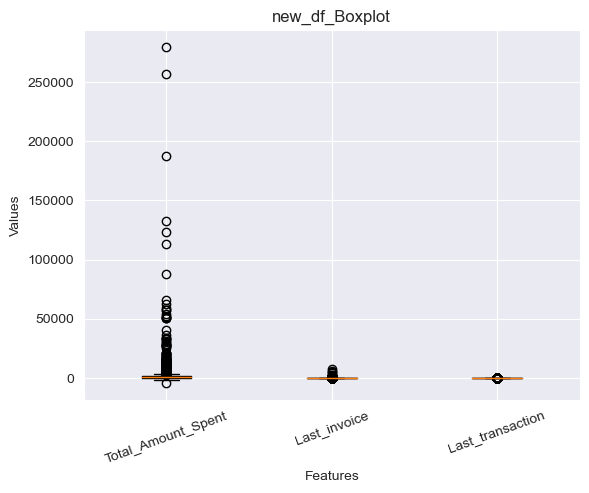

In [34]:
import matplotlib.pyplot as plt
plt.boxplot([new_df['Total_Amount_Spent'], new_df['Last_invoice'], new_df['Last_transaction']])
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(range(1, 4), ['Total_Amount_Spent', 'Last_invoice', 'Last_transaction'], rotation=20)
plt.title('new_df_Boxplot')
plt.show()

### Use Tukey's rule for finding outliers for each feature

In [35]:
log_data = np.log(new_df)
log_samples =  np.log(samples)

all_outliers = np.array([], dtype='int64')
for feature in log_data.columns:
    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)
    step = 1.5 * (Q3 - Q1)
    outlier_pts = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print("In", feature, "the outliers are:")
    print(outlier_pts)
    all_outliers = np.append(all_outliers, outlier_pts.index.values.astype("int64"))

In Last_invoice the outliers are:
      Last_invoice  Total_Amount_Spent  Last_transaction
125       0.000000                 NaN          5.820083
127       0.000000                 NaN          5.703782
330       8.442901           10.277534              -inf
467       0.000000                 NaN          5.703782
520       0.000000            5.318120          1.791759
...            ...                 ...               ...
4241      0.000000            4.334935          5.908083
4261      0.000000                 NaN          5.886104
4287      0.000000            4.644391          1.791759
4295      0.000000            3.908015          2.639057
4334      0.000000            6.086775          5.783825

[90 rows x 3 columns]
In Total_Amount_Spent the outliers are:
      Last_invoice  Total_Amount_Spent  Last_transaction
0         0.693147                -inf          5.783825
1         5.204007            8.368693          0.000000
2         3.433987            7.494007          

### Print the outliers that are repeating on more the one feature

In [36]:
all_outliers_u, indices = np.unique(all_outliers, return_inverse=True)
repeating_outliers = all_outliers_u[np.bincount(indices) > 1]
print("outliers that are repeating on more then one feature:")
print(log_data.loc[repeating_outliers])

outliers that are repeating on more then one feature:
      Last_invoice  Total_Amount_Spent  Last_transaction
61        4.836282            7.522460              -inf
71        6.040255            9.501208              -inf
105       5.575949            8.786698              -inf
125       0.000000                 NaN          5.820083
127       0.000000                 NaN          5.703782
...            ...                 ...               ...
4241      0.000000            4.334935          5.908083
4261      0.000000                 NaN          5.886104
4287      0.000000            4.644391          1.791759
4295      0.000000            3.908015          2.639057
4334      0.000000            6.086775          5.783825

[190 rows x 3 columns]


### How many outliers are there?

In [37]:
print("Total num of outliers:", len(all_outliers_u))

Total num of outliers: 4372


### Create a new data frame (final) without the outliers that are repeating more than once

In [38]:
good_data = log_data.drop(log_data.index[repeating_outliers])

### Check the shape of the final data frame

In [39]:
print("Shape of 'good_data':", good_data.shape)

Shape of 'good_data': (4182, 3)


___
# Clustering

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(good_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

err: ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

err solution:copy the data frame to two data frames: 
first, Ill add the median to the null/-inf values.
second, dropping the values from the data frame.


In [47]:
good_data_dropped = good_data_dropped.replace([np.inf, -np.inf], np.nan)
good_data_dropped = good_data_dropped.apply(lambda x: x.fillna(x.max()), axis=0)
good_data_filled = good_data_filled.replace([np.inf, -np.inf], np.nan)
good_data_filled = good_data_filled.apply(lambda x: x.fillna(x.max()), axis=0)
good_data_dropped.shape, good_data_filled.shape 

((4158, 3), (4182, 3))

### Use the Elbow Method to choose the number of clusters

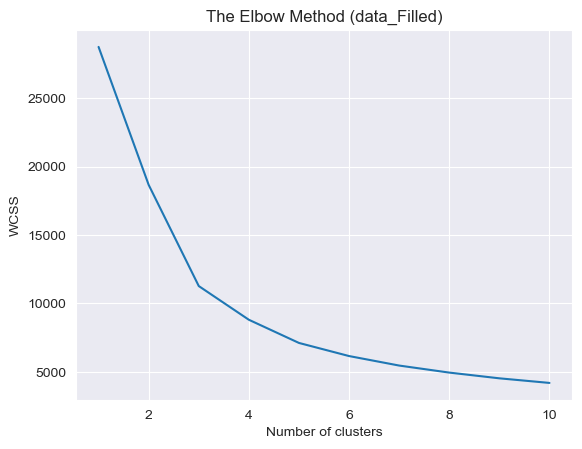

In [55]:
wcss_filled = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(good_data_filled)
    wcss_filled.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_filled)
plt.title('The Elbow Method (data_Filled)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### How many clusters does the elbow method suggest is best?

In [53]:
print("the elbow method suggests 3 clusters")

the elbow method suggests 3 clusters


### Use Dendrogram to choose the number of clusters

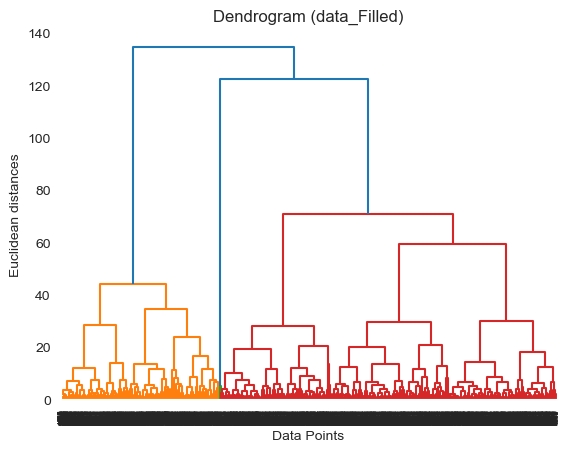

In [54]:
dendrogram_filled = sch.dendrogram(sch.linkage(good_data_filled, method='ward'))
plt.title('Dendrogram (data_Filled)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

### How many clusters does the dendrogram suggest is best?

In [56]:
print("the dendogram method suggests 3 clusters")

the dendogram method suggests 3 clusters


___
# Apply to data

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

### Instantiate the KMeans model with the number of clusters you found, fit and predict

In [59]:
clusterer = KMeans(n_clusters=3, random_state=42)
preds = clusterer.fit_predict(good_data_filled)
centers = clusterer.cluster_centers_

### What are the cluster's centers?

In [60]:
print(centers)

[[  4.69385645   7.4944031    2.61438221]
 [  2.96823705   5.8545571    4.59268241]
 [  3.50612146 -32.6354539    3.22814286]]


### Check the silhouette score of the kmeans algorithm

In [61]:
kmeans_silhouette_score = silhouette_score(good_data_filled, preds, metric='euclidean')
print('Silhouette Score for KMeans:', kmeans_silhouette_score)

Silhouette Score for KMeans: 0.3960557049445531


### Check the silhouette score of the Gaussian Mixture algorithm

In [63]:
gmix = GaussianMixture(n_components=3, random_state=42)
gmix_preds = gmix.fit_predict(good_data_filled)
gmix_silhouette_score = silhouette_score(good_data_filled, gmix_preds, metric='euclidean')
print('Gaussian Mixture sil score:', gmix_silhouette_score)


Gaussian Mixture sil score: 0.24880417765311286


### Which algorithm is better?

In [64]:
print("KMeans is better: ", kmeans_silhouette_score)

KMeans is better:  0.3960557049445531


### Create a new column for the final data frame that contains the predictions

In [65]:
final_data = good_data_filled.copy()
final_data['Cluster'] = preds

### Print the head of the final data frame

In [66]:
final_data.head()

,Last_invoice,Total_Amount_Spent,Last_transaction,Cluster
0,0.693147,12.141439,5.783825,1
1,5.204007,8.368693,0.000000,0
2,3.433987,7.494007,4.304065,1
3,4.290459,7.471676,2.890372,0
4,2.833213,5.812338,5.733341,1


### Print a scatterplot of the total amount spent against the last invoice based off of the clusters prediction
use palette = 'icefire'

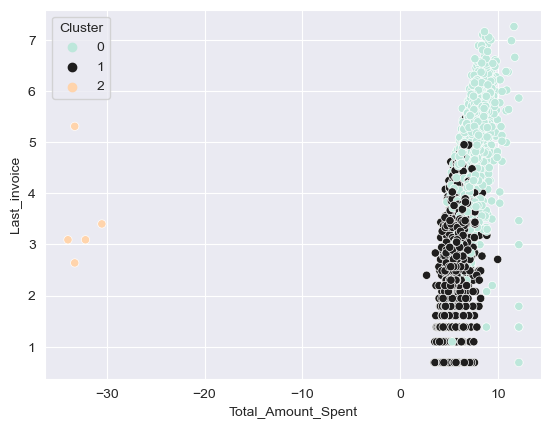

In [67]:
sns.scatterplot(x='Total_Amount_Spent', y='Last_invoice', hue='Cluster', data=final_data, palette='icefire')
plt.show()

### Print a scatterplot of the total amount spent against the last transaction based off of the clusters prediction
use palette = 'icefire'

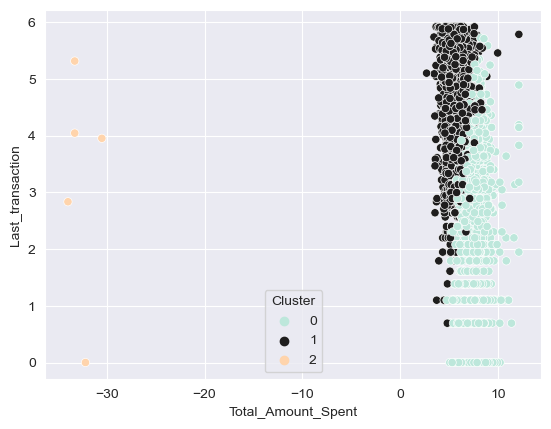

In [68]:
sns.scatterplot(x='Total_Amount_Spent', y='Last_transaction', hue='Cluster', data=final_data, palette='icefire')
plt.show()

### Print a scatterplot of the last transaction against the last invoice based off of the clusters prediction
use palette = 'icefire'

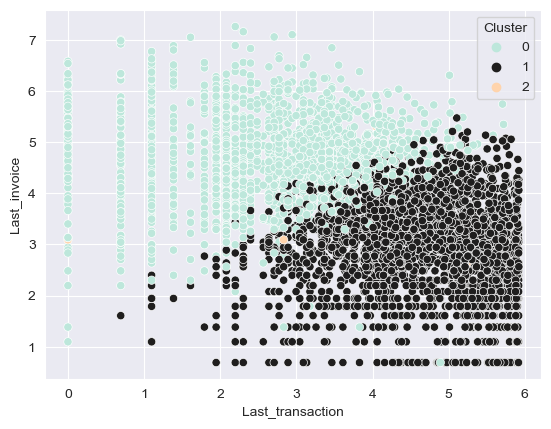

In [69]:
sns.scatterplot(x='Last_transaction', y='Last_invoice', hue='Cluster', data=final_data, palette='icefire')
plt.show()

### Print a 3D plot of the three features based off of the clusters prediction
use palette = 'icefire'

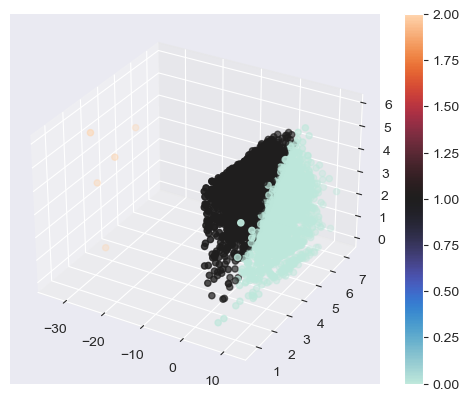

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(final_data['Total_Amount_Spent'], final_data['Last_invoice'], final_data['Last_transaction'], c=final_data['Cluster'], cmap='icefire')
plt.colorbar(scatter)
plt.show()

___
#blabla